https://github.com/kaa/coins-dataset

In [76]:

import argparse
import glob
import os
import re
import sys

import cv2
import numpy as np

import __main__ as main

import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from tensorflow import keras

In [77]:
def loadImage(src):
    img = cv2.imread(src)
    if not img is None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [78]:
def findCoins(img, showCoins = False):
    scaling = 600.0/max(img.shape[0:2])
    #print (scaling)
    img_gray = cv2.resize(img, None, fx=scaling, fy=scaling)
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.blur(img_gray, (5,5))
    coins = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1.2, 30, param2 = 35, minRadius = 20, maxRadius = 50)
    coins = (np.round(coins[0,:]) / scaling).astype("int")
    return coins

In [79]:
local_img="real_test_data/multi/IMG_20220620_105307.jpg"
colab_img="/content/Coins/real_test_data/multi/IMG_20220620_105307.jpg"

local_model_dir = "Models/Tuned/tuned_model"
colab_model_dir = "/content/Coins/Models/Tuned/tuned_model"

In [81]:
model_loaded = keras.models.load_model(local_model_dir)

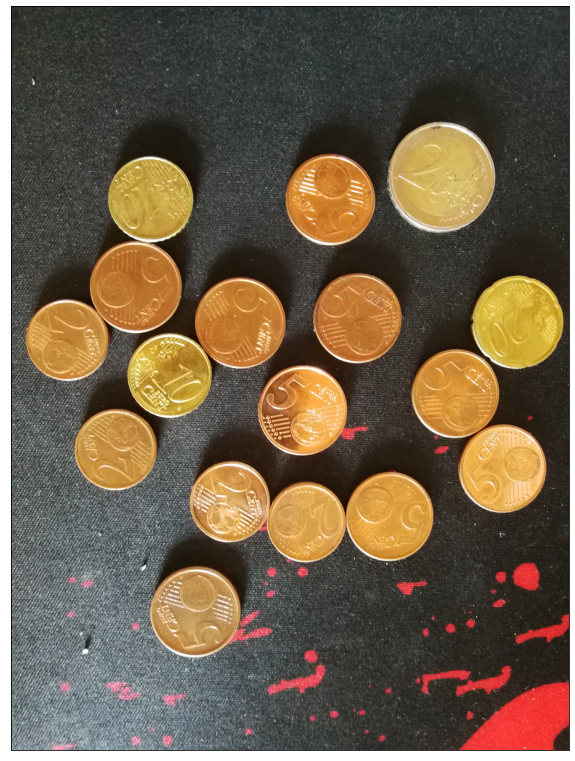

In [82]:
img = loadImage(local_img)
plt.figure(figsize=(10, 20))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [83]:
coins = findCoins(img, showCoins = True)

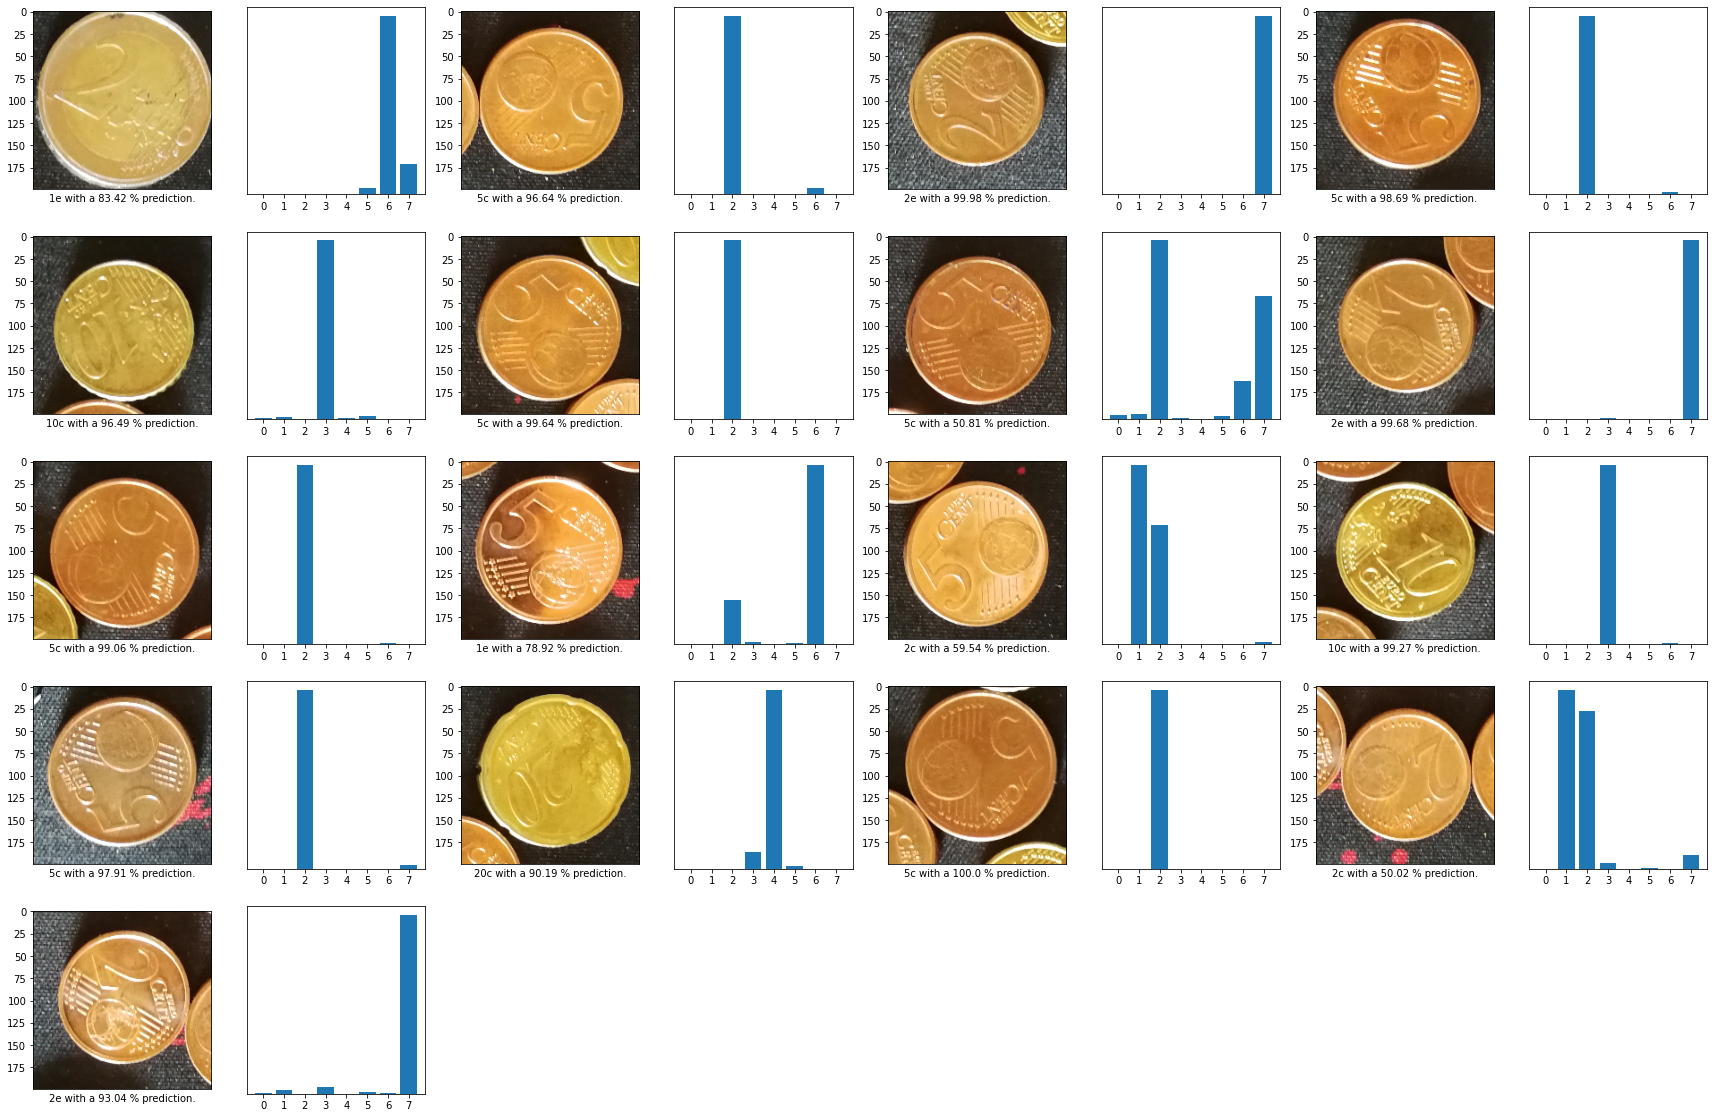

In [99]:
maxRadius = np.amax(coins,0)[2]

class_names=["1c", "2c", "5c", "10c", "20c", "50c", "1e", "2e"]
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(30,20))

for i,(x,y,r) in enumerate(coins):
    img_coin = img[y-maxRadius:y+maxRadius, x-maxRadius:x+maxRadius]
    if img_coin.shape[0]==0 or img_coin.shape[1]==0:
        continue

    img_coin = cv2.resize(img_coin, (200,200))
    x = img_to_array(img_coin)                    
    x = x.reshape((1,) + x.shape)

    s_prediction = model_loaded.predict(x)

    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plt.xticks([])
    plt.xlabel(f"{class_names[np.argmax(s_prediction)]} with a { (100 * np.max(s_prediction)).round(2) } % accuracy.")
    plt.imshow(img_coin)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.xticks(range(8))
    plt.yticks([])
    plt.bar(range(8),s_prediction[0])

plt.show()